In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "iris-flower-dataset"

In [3]:
ds <- read.csv("/kaggle/input/iris-flower-dataset/IRIS.csv")
head(ds)

,sepal_length,sepal_width,petal_length,petal_width,species
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa


In [ ]:
# Install and load necessary packages
install.packages("randomForest")
install.packages("caret")
install.packages("e1071")
install.packages("randomForestExplainer")
install.packages("ggplot2")

library(randomForest)
library(caret)
library(e1071)
library(randomForestExplainer)
library(ggplot2)


In [7]:
str(ds)

'data.frame':	150 obs. of  5 variables:
 $ sepal_length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ sepal_width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ petal_length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ petal_width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ species     : chr  "Iris-setosa" "Iris-setosa" "Iris-setosa" "Iris-setosa" ...


In [10]:
# Convert the "species" variable to a factor
ds$species <- as.factor(ds$species)



Call:
 randomForest(formula = species ~ sepal_length + sepal_width +      petal_length + petal_width, data = ds, ntree = 500) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 4%
Confusion matrix:
                Iris-setosa Iris-versicolor Iris-virginica class.error
Iris-setosa              50               0              0        0.00
Iris-versicolor           0              47              3        0.06
Iris-virginica            0               3             47        0.06


Confusion Matrix and Statistics

                 Reference
Prediction        Iris-setosa Iris-versicolor Iris-virginica
  Iris-setosa              50               0              0
  Iris-versicolor           0              50              0
  Iris-virginica            0               0             50

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.9757, 1)
    No Information Rate : 0.3333     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: Iris-setosa Class: Iris-versicolor
Sensitivity                      1.0000                 1.0000
Specificity                      1.0000                 1.0000
Pos Pred Value                   1.0000                 1.0000
Neg Pred Value                   1.0000                 1.0

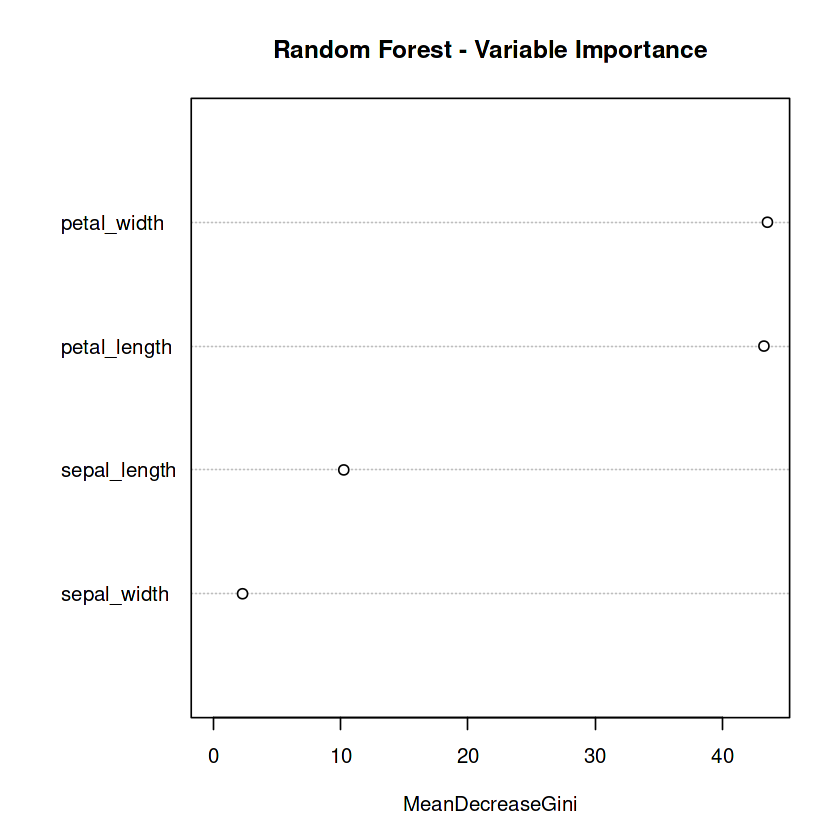

In [15]:

# Fit a Random Forest classifier
set.seed(42)  # For reproducibility
rf_model <- randomForest(species ~ sepal_length + sepal_width + petal_length + petal_width, data = ds, ntree = 500)

# Print a summary of the model
print(rf_model)

# Visualize feature importance
varImpPlot(rf_model, main = "Random Forest - Variable Importance")

# Predictions on the same dataset (for demonstration)
predictions <- predict(rf_model, ds)

# Confusion matrix
confusionMatrix(predictions, ds$species)



In [17]:
install.packages("randomForestExplainer")
library(randomForestExplainer)

# Create an explainer object for the Random Forest model
rf_explainer <- explain(rf_model, data = ds[, -5])  # Exclude the target 'species' column

# Visualize the individual trees in the Random Forest
plot(rf_explainer)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



ERROR: Error in library(randomForestExplainer): there is no package called ‘randomForestExplainer’
